## Analysis of a customer complaint dataset

To start off the analysis, the first step was to load the necessary libraries. For this case, we, first of all, need Pandas to handle the raw data, which is contained in a CSV file. Second, for cleaning the data, we use the NLTK library and the TextBlob library, which is an API to the NLTK library. Additionally, we download NLTK's stopwords. Then for vectorizing the cleaned data, we load the TF-IDF and BoW classes of the Sklearn library. Finally, we need NumPy to prepare the data for visualization and Matplotlib for plotting.

In [3]:
import pandas as pd

import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob.en.np_extractors import FastNPExtractor

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

import numpy as np
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset
After importing the necessary libraries, the next step was to load the customer complaints dataset. Additionally, we drop the NaN columns. A look at the shape of the dataset then reveals a format of 5629 rows and four columns. We also look at a histogram of the ratings to see the general sentiment in the dataset, which reveals that, indeed this dataset contains mostly complaints.

In [4]:
def load_data(debug=False):
    df = pd.read_csv('comcast_complaints.csv')
    df = df.dropna()
    
    if debug:
        df = df.head() # Use for testing
        
    return df

In [5]:
df = load_data()
df.shape

(5629, 4)

In [6]:
df.head()

author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  I used to love Comcast. Until all these consta...  
1  I'm so over Comcast! The worst internet provid...  
2  If I could give them a negative star or no sta...  
3  I've had the worst experiences so far since in...  
4  Check your contract when you sign up for Comca...

<AxesSubplot:>

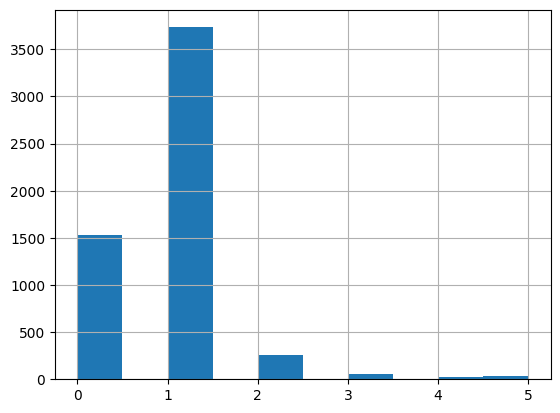

In [7]:
df['rating'].hist()

### Preprocessing the complaints
For preprocessing the complaints, there are four different options, which will be examined individually. The options are lemmatization, stemming, forming bigrams, and extracting noun phrases. For all options, the English stopwords, as defined by the NLTK library, are removed. Additionally, variations of the company name are added to the stop words as they occur fairly often and obscure the words more important to the analysis. To get an overview of the preprocessed complaints we also create wordclouds for each option.

In [8]:
def remove_stopwords(df):
    # Extend the nltk english stopwords with the words 'Comcast', 'COMCAST', 'Xfinity' and 'xfinity'
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['Comcast', 'COMCAST', 'Xfinity', 'xfinity'])

    # Remove all punctuation and stopwords
    df['text'] = df['text'].str.replace('[^\w\s]','')
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
    
    return df

#### Preprocessing Option 1: Removing stopwords and lemmatization

In [16]:
df = load_data()

In [17]:
df = remove_stopwords(df)

C:\Users\Marco\AppData\Local\Temp\ipykernel_15128\1385417921.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [18]:
# Lemmatize the words
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [19]:
df.head()

author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  I used love Until constant update My internet ...  
1  Im The worst internet provider Im taking onlin...  
2  If I could give negative star star review I wo...  
3  Ive worst experience far since install 10416 N...  
4  Check contract sign advertised offer match con...

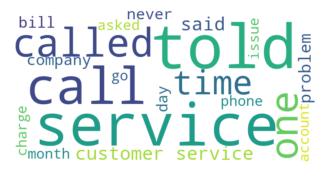

In [20]:
# Create a wordclound from the text column
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(4,2))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

By looking at the word cloud, we can already get a picture of what some of the major underlying issues of the company could be. For example, we could derive problems such as the customer service in general or that customers never got called back.

#### Preprocessing Option 2: Removing stopwords and stemming

In [34]:
df = load_data()

In [35]:
df = remove_stopwords(df)

C:\Users\Marco\AppData\Local\Temp\ipykernel_15128\1385417921.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [36]:
# Stem the words
stemmer = nltk.stem.PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [37]:
df.head()

author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  i use love until constant updat my internet ca...  
1  im the worst internet provid im take onlin cla...  
2  if i could give neg star star review i would i...  
3  ive worst experi far sinc instal 10416 noth pr...  
4  check contract sign advertis offer match contr...

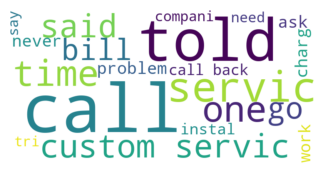

In [38]:
# Create a wordclound from the text column
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(4,2))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

For stemming, we get similar results as for lemmatization. Although lemmatization arguably is the better option as complete words are derived.

#### Preprocessing Option 3: Removing stopwords and forming bigrams

In [50]:
df = load_data()

In [51]:
df = remove_stopwords(df)

C:\Users\Marco\AppData\Local\Temp\ipykernel_15128\1385417921.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [52]:
# Form bigrams from the words in the text. Join the individual bigrams with an _
df['text'] = df['text'].apply(lambda x: ' '.join(['_'.join(bigram) for bigram in nltk.bigrams(x.split())]))

In [53]:
df.head()

author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  I_used used_love love_Until Until_constant con...  
1  Im_The The_worst worst_internet internet_provi...  
2  If_I I_could could_give give_negative negative...  
3  Ive_worst worst_experiences experiences_far fa...  
4  Check_contract contract_sign sign_advertised a...

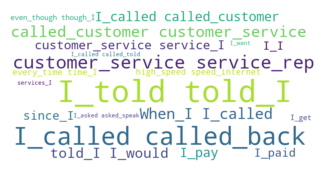

In [54]:
# Create a wordclound from the text column
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(4,2))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Like the previous two options, this word cloud also gives us a clue about possible issues with the customer service. Although in contrast to the previous word clouds, it is not so clear anymore if there is a problem with the customer service not calling back. This is most likely because of the formation of the bigrams.

#### Preprocessing Option 4: Extracting noun phrases

In [65]:
df = load_data()

In [66]:
df = remove_stopwords(df)

C:\Users\Marco\AppData\Local\Temp\ipykernel_15128\1385417921.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [67]:
# Extract noun phrases
extractor = FastNPExtractor()
df['text'] = [extractor.extract(review) for review in df['text']]
df['text'] = df['text'].apply(lambda x: [phrase.replace(' ', '_') for phrase in x])
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [68]:
df.head()

author      posted_on  rating  \
0  Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
1     Vera of Philadelphia, PA  Nov. 19, 2016       1   
2  Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
3     Dennis of Manchester, NH  Nov. 16, 2016       1   
4         Ryan of Bellevue, WA  Nov. 14, 2016       1   

                                                text  
0  constant_updates internet_cable_crash_lot_nigh...  
1  Im internet_provider Im online_classes multipl...  
2  negative_star_stars_review bad_customer_servic...  
3  Ive service_appointments_extreme_difficulty Im...  
4  contract_issue 150Mbps_internet 25Mbps_interne...

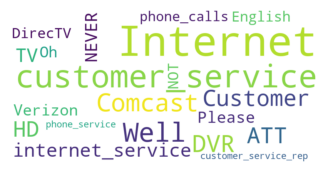

In [69]:
# Create a wordclound from the text column
stopwords=['Im', 'Ive', 'Id', 'July', 'August', 'March', 'January', 'April', 'October', 'June', 'December', 'May', 'September']
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, max_words=20, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(4,2))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The fourth and last processing option reveals another possible set of problems in contrast to the customer service issues. According to this word cloud, there could also be problems with the internet service in general and also with the DVR, which is Comcasts' digital video recorder. 

### Vectorizing the processed complaints
For vectorizing, we will look into the BoW and TF-IDF methods. The process here is very similar to both options and consists of initializing the respective class, converting the complaints into a list, and passing the list to the vectorizers' fit_transform method. Additionally, we save the feature names which we need further on for topic modeling.

#### Vectorizing Option 1: BoW

In [70]:
# Vectorize with the BoW method
vectorizer = CountVectorizer()
corpus = df['text'].to_list()
vectorized = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

C:\Users\Marco\.virtualenvs\code-Vz8yUB5G\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Vectorizing Option 2: Tf-Idf

In [75]:
# Vectorize with the Tf-IDF method
vectorizer = TfidfVectorizer(lowercase=False, norm=False)
corpus = df['text'].to_list()
vectorized = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

C:\Users\Marco\.virtualenvs\code-Vz8yUB5G\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Topic Modeling
As for vectorizing, we will look into two methods for topic modeling, namely LSA and LDA. Here the process is also very similar for both options. We first initialize the respective class from the Sklearn library and pass the vectorized corpus to the fit method. The n_components parameter, which defines the number of topics, is set to four. After fitting the model, we then plot the top five words for each of the four topics.

#### Topic Modelling Option 1: LDA

In [76]:
# Use the LDA algorithm for topic modelling
lda = LatentDirichletAllocation(n_components=4, random_state=0)
lda.fit(vectorized)

LatentDirichletAllocation(n_components=4, random_state=0)

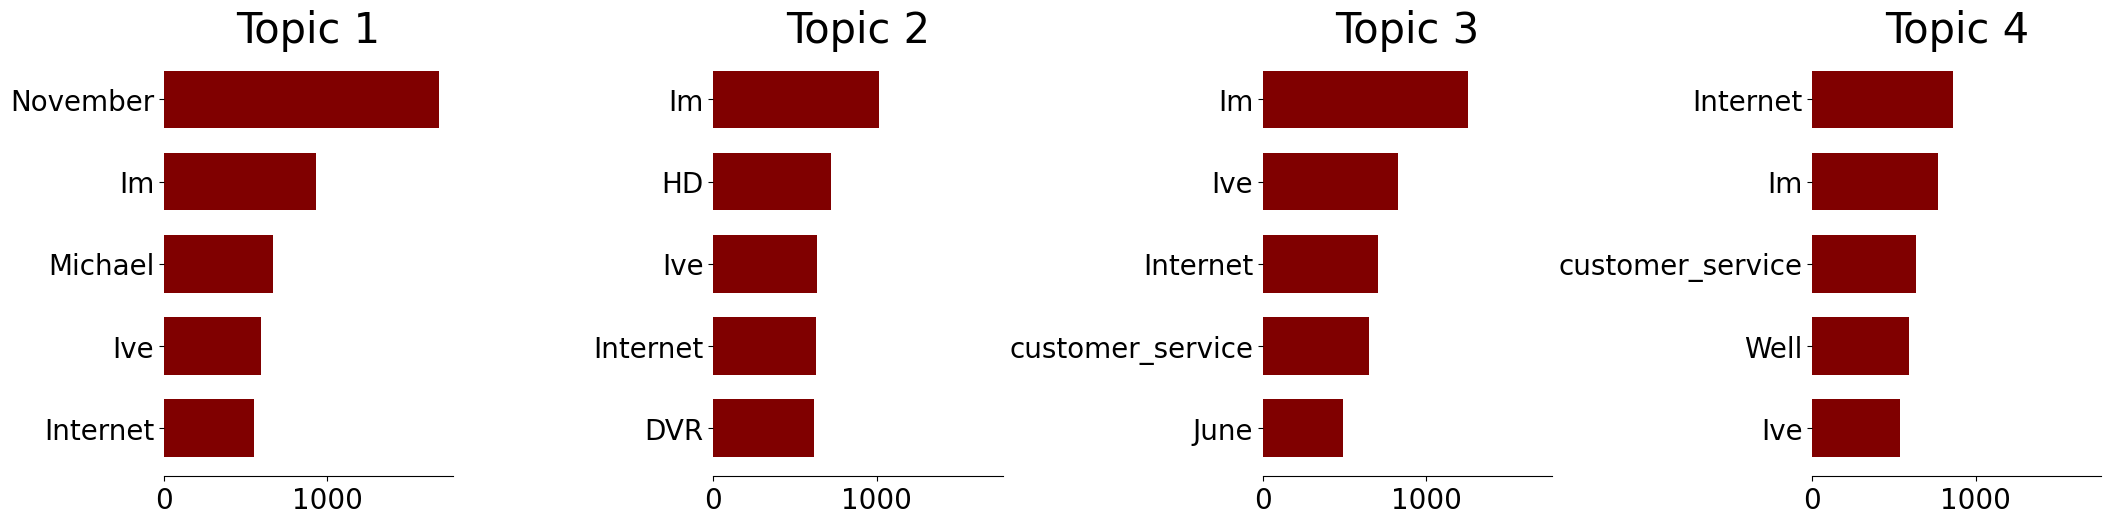

In [77]:
# Plot the top words of each topic
n_top_words = 5

fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharex=True)
axes = axes.flatten()
    
for topic_idx, topic in enumerate(lda.components_):
    
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7, color ='maroon')
    ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.savefig('Output/noun_tfidf_lda')
plt.show()

#### Topic Modelling Option 2: LSA

In [78]:
# Use the LSA algorithm for topic modelling
lsa = TruncatedSVD(n_components=4, random_state=0)
lsa = lsa.fit_transform(vectorized)

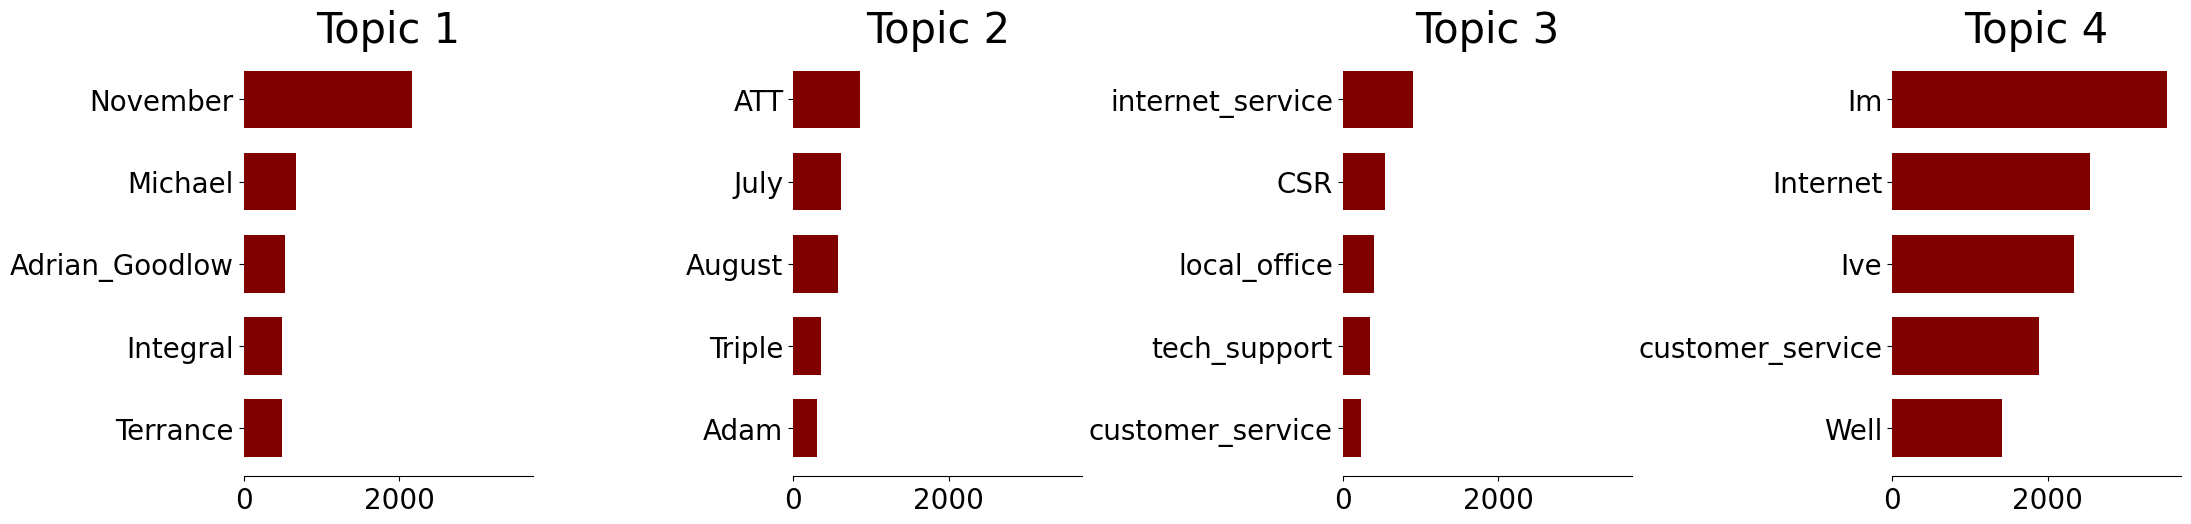

In [79]:
# Create a new column by assigning the most certain topic to a record
df['topic'] = lsa.argmax(axis=1)

# Count the occurence of each word for each topic and save it in a numpy array
word_count = np.zeros((4, len(feature_names)))
for i in range(4):
    word_count[i] = np.sum(vectorized[df['topic'] == i], axis=0)

# Show the most prominent words for every topic
n_top_words = 5

fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharex=True)
axes = axes.flatten()
    
for topic_idx, topic in enumerate(word_count):
    
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7, color ='maroon')
    ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.savefig('Output/noun_tfidf_lsa')
plt.show()